In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
torch.manual_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cpu


In [3]:
def function_1(x):
  return (np.sin(5 * (np.pi) * x)) / (5 * np.pi * x)

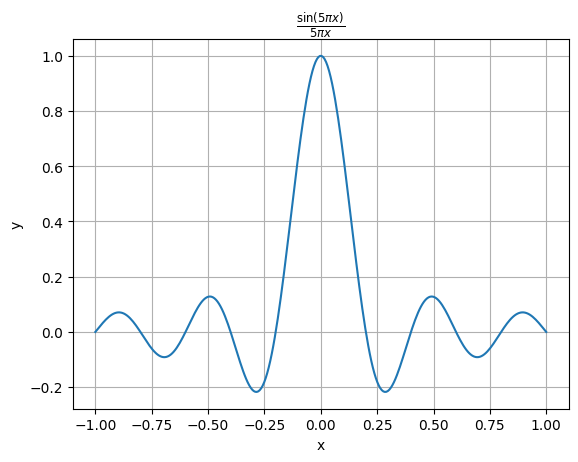

In [10]:
# Generate Data for fun 1
x = np.linspace(-1, 1, 300).reshape(-1, 1)
y = function_1(x)
func1_x, func1_y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(func1_x, func1_y)
plt.title(r'$\frac{\sin(5 \pi x)}{5 \pi x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [11]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer_1 = nn.Linear(1, 5)
        self.layer_2 = nn.Linear(5, 10)
        self.layer_3 = nn.Linear(10, 10)
        self.layer_4 = nn.Linear(10, 10)
        self.layer_5 = nn.Linear(10, 10)
        self.layer_6 = nn.Linear(10, 10)
        self.layer_7 = nn.Linear(10, 5)
        self.layer_8 = nn.Linear(5, 1)

    def forward(self, input_data):
        x1 = F.relu(self.layer_1(input_data))
        x2 = F.relu(self.layer_2(x1))
        x3 = F.relu(self.layer_3(x2))
        x4 = F.relu(self.layer_4(x3))
        x5 = F.relu(self.layer_5(x4))
        x6 = F.relu(self.layer_6(x5))
        x7 = F.relu(self.layer_7(x6))
        x8 = self.layer_8(x7)
        return x8

In [12]:

def train_model(model, inputs, outputs):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
    max_epochs = 20000
    losses = []
    grad_data = []

    for epoch in range(max_epochs):
        model.train()
        predictions = model(inputs)
        loss = criterion(predictions, outputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        grad_data.append(grad_norm)

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}/{max_epochs}, Loss: {loss.item()}')
        if losses[-1] < 0.001:
          print("Convergence achieved, stopping it")
          break

    return losses, grad_data

In [13]:
model_one = Model()
model_one_losses, grad_data = train_model(model_one, func1_x, func1_y)

Epoch 0/20000, Loss: 0.1569879651069641
Epoch 1000/20000, Loss: 0.08692876249551773
Epoch 2000/20000, Loss: 0.08346810936927795
Epoch 3000/20000, Loss: 0.010976280085742474
Epoch 4000/20000, Loss: 0.005909239407628775
Epoch 5000/20000, Loss: 0.0041929795406758785
Epoch 6000/20000, Loss: 0.002502894727513194
Epoch 7000/20000, Loss: 0.0015494606923311949
Epoch 8000/20000, Loss: 0.0013210722245275974
Epoch 9000/20000, Loss: 0.0012765884166583419
Epoch 10000/20000, Loss: 0.0012616432504728436
Epoch 11000/20000, Loss: 0.0012423046864569187
Epoch 12000/20000, Loss: 0.0011210334487259388
Convergence achieved, stopping it


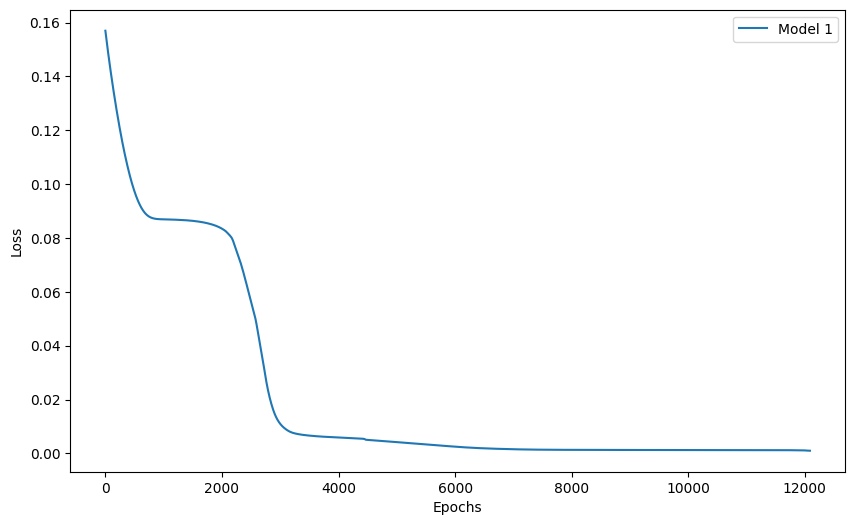

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(model_one_losses, label='Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

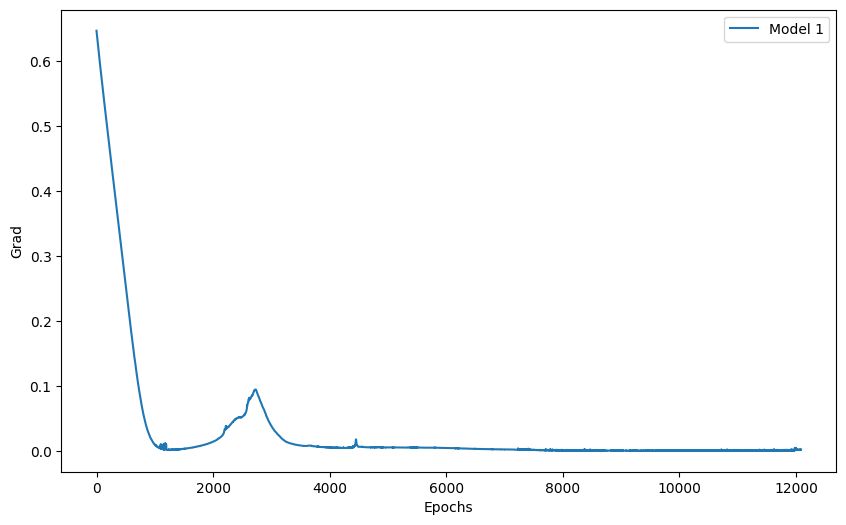

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(grad_data, label='Model 1')
plt.xlabel('Epochs')
plt.ylabel('Grad')
plt.legend()
plt.show()